## Makas Yusuf
## Kacimi Walid

# Methode num edp TP 2

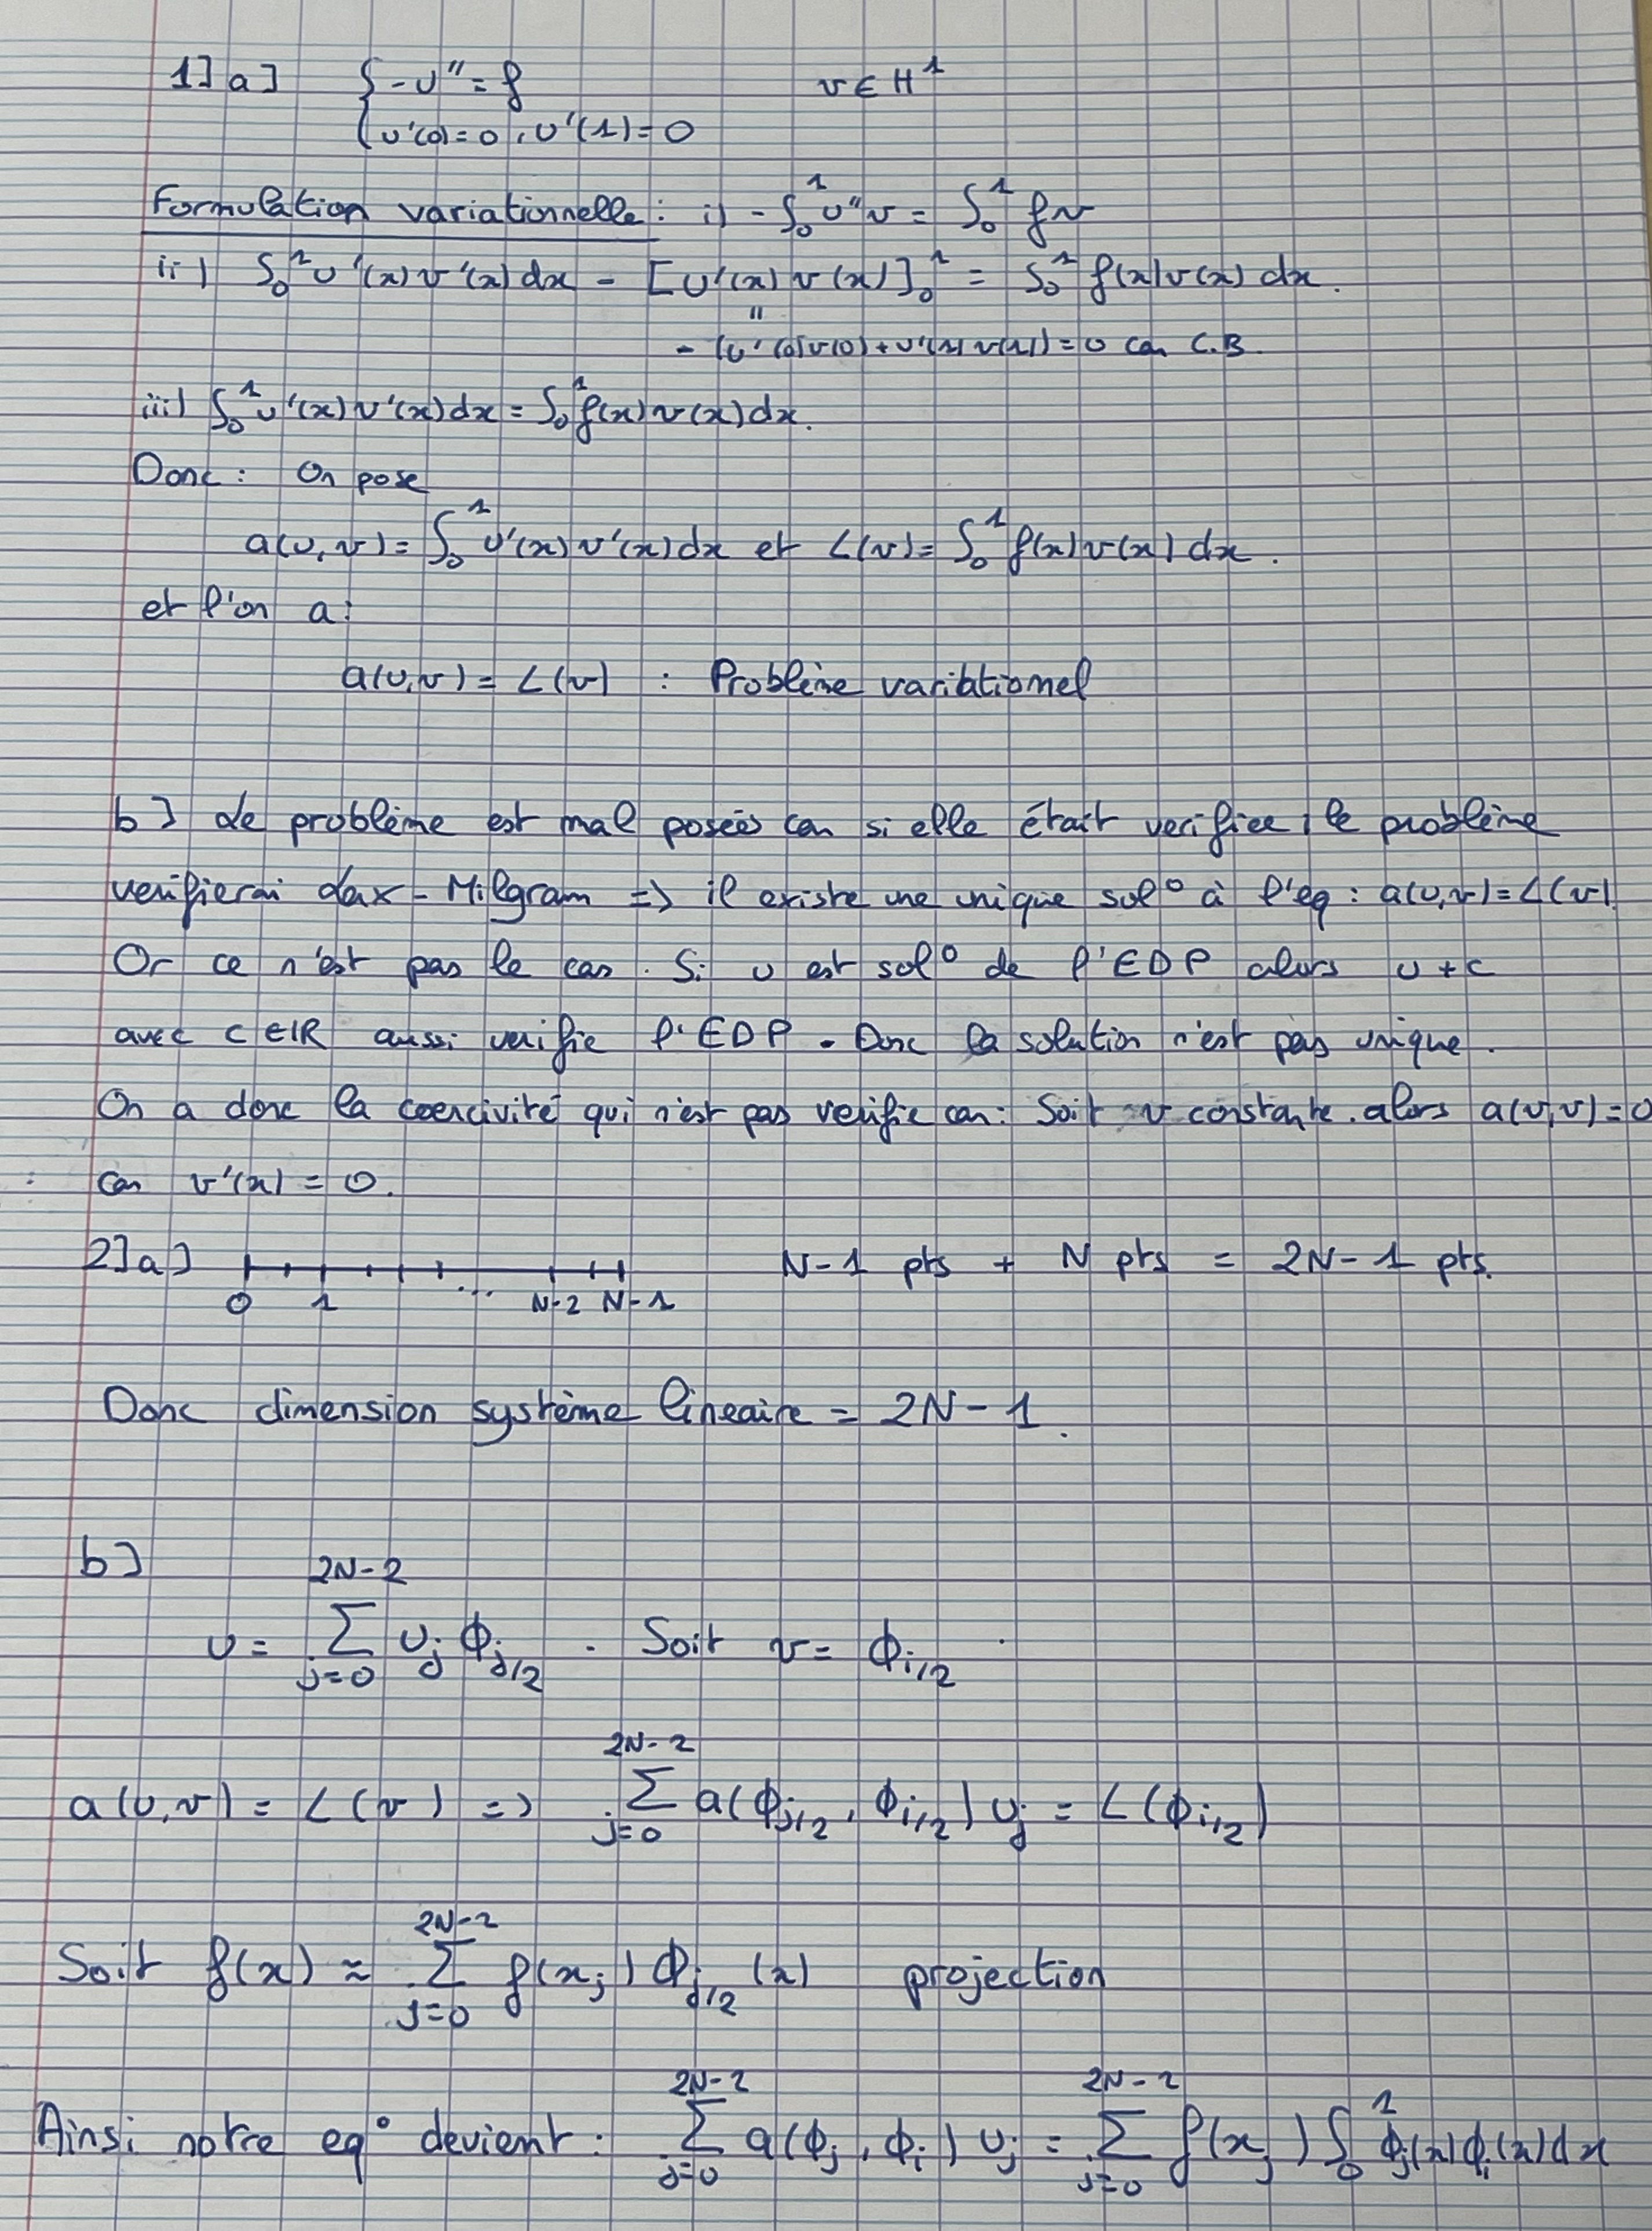

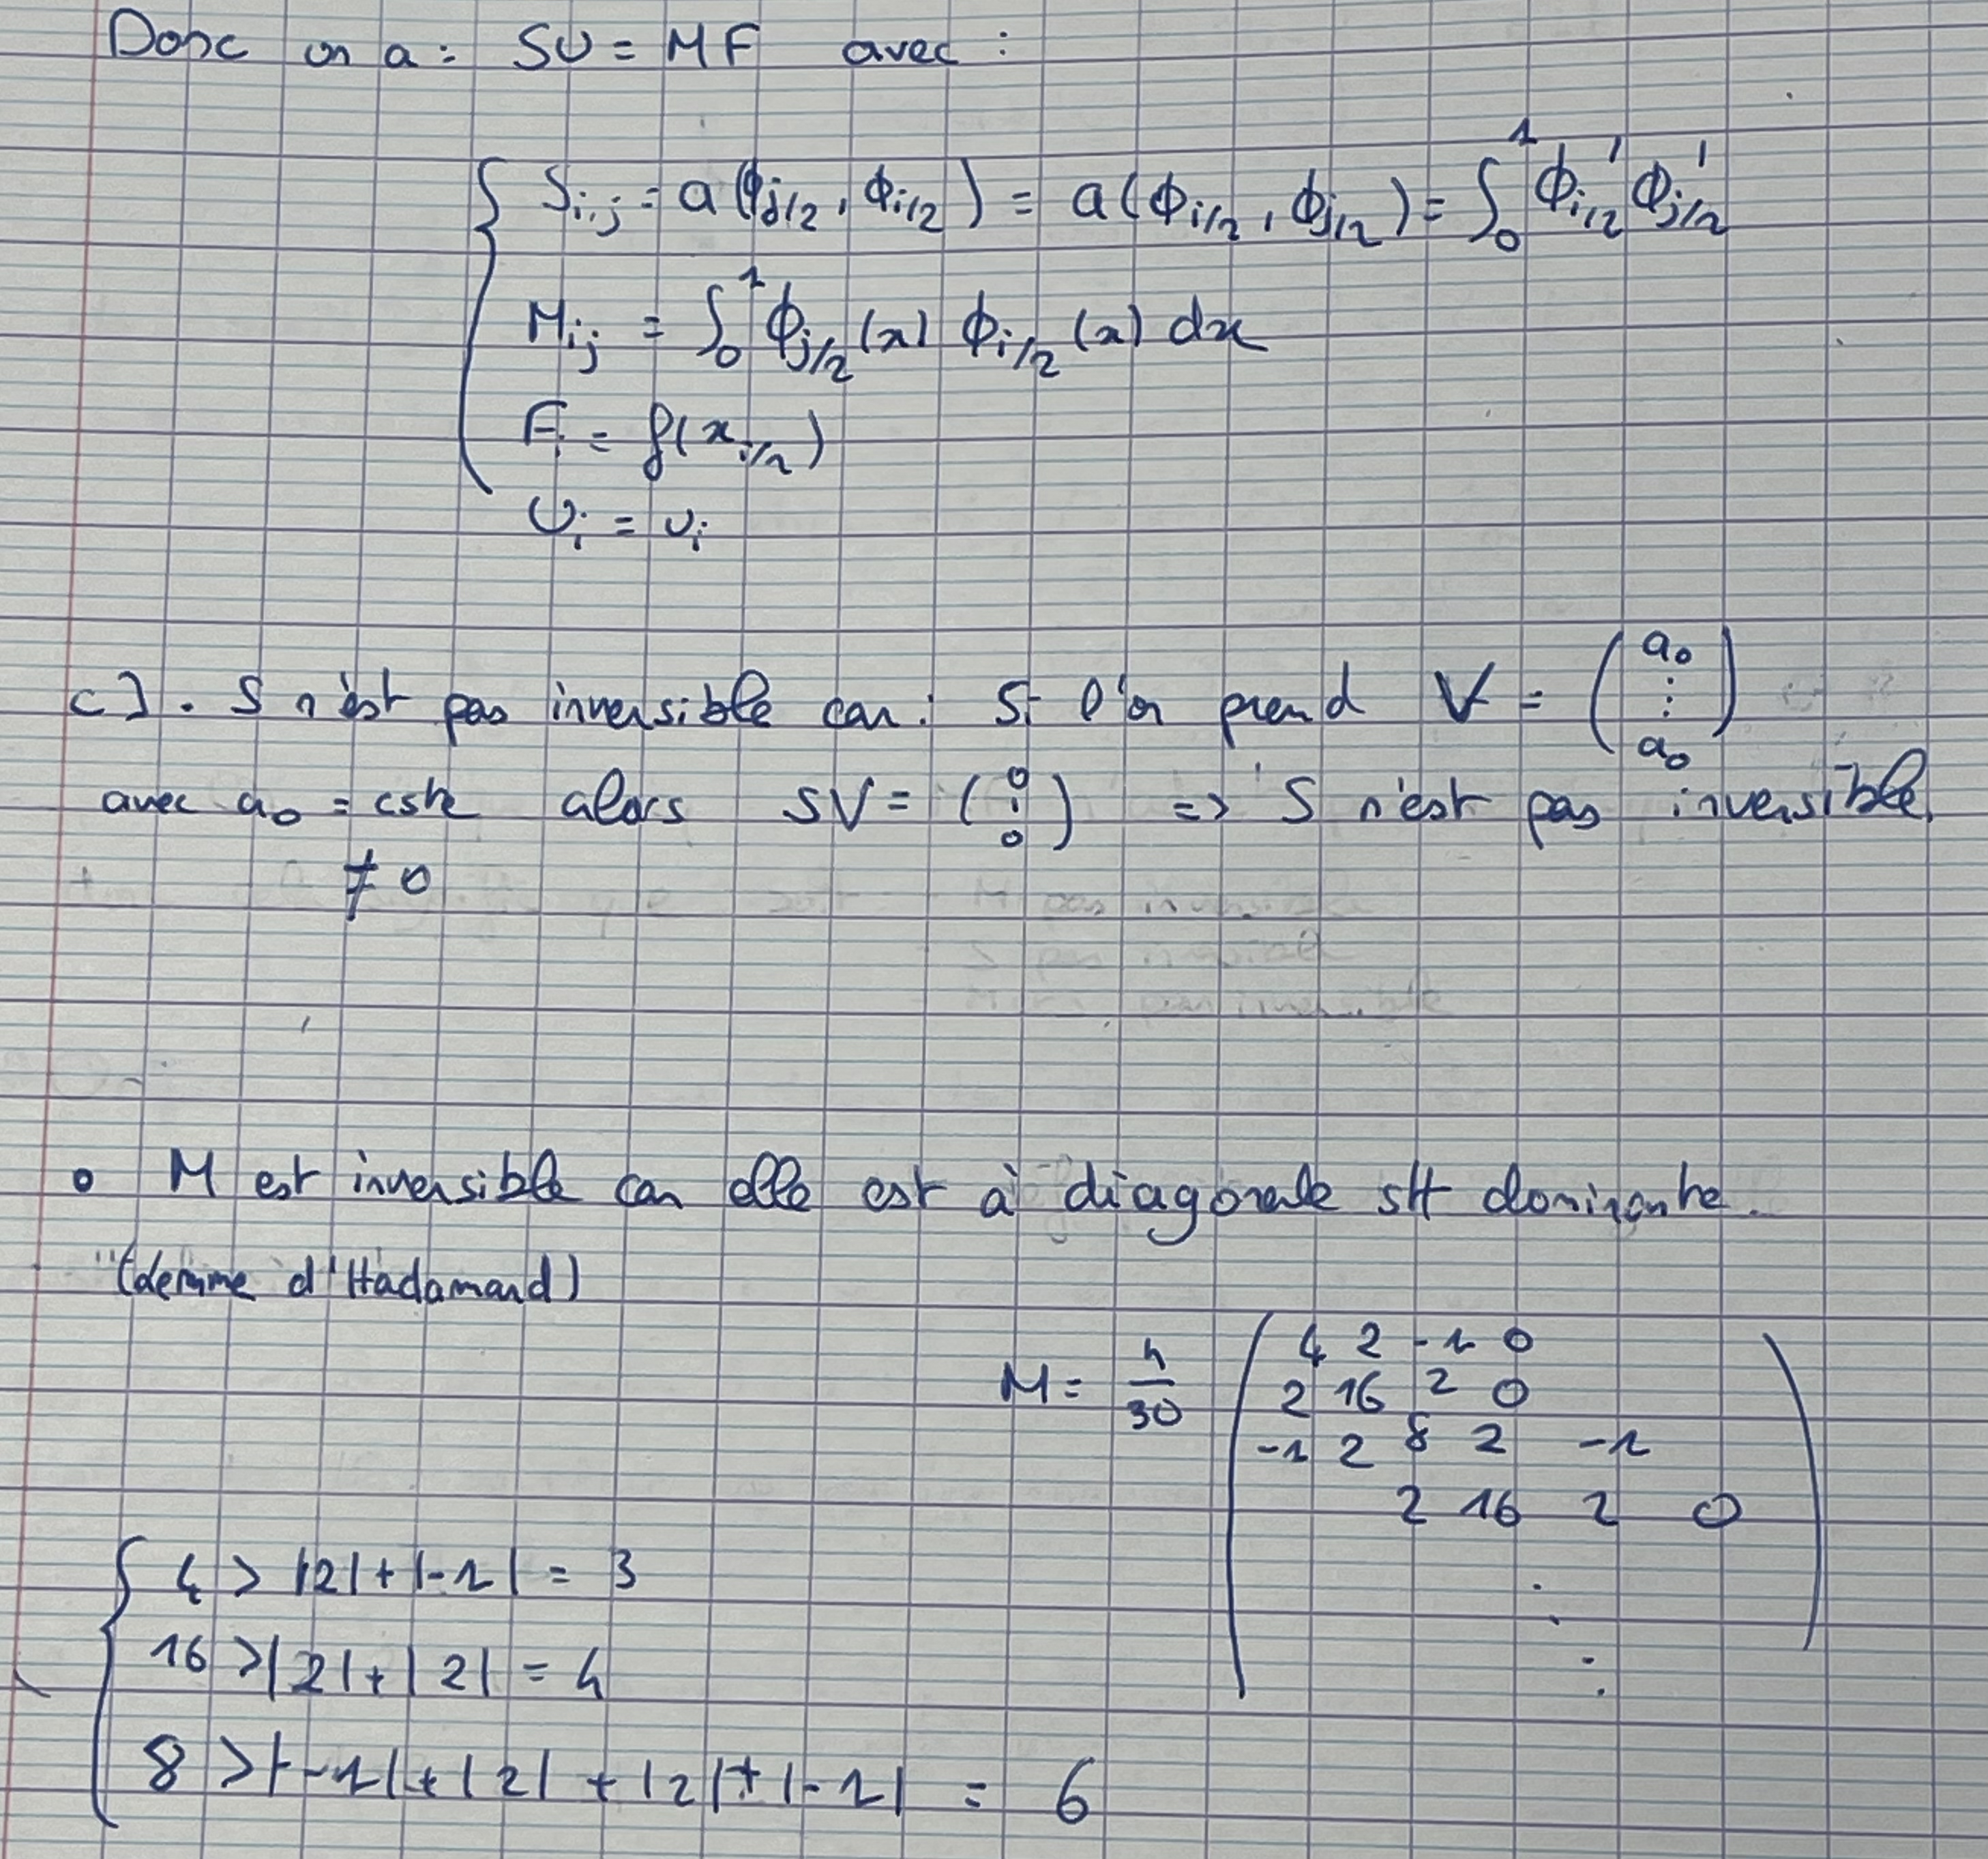

## 3)

### a)

In [75]:
from numpy import *
from scipy.linalg import lu_factor, lu_solve, inv
import matplotlib.pyplot as plt


In [90]:
def maillage(nx):
    # Mesh definition
    noeuds = linspace(0,1,2*nx-1)

    # Conextivity table
#     elements = zeros((nx,3),dtype=int)
#     elements[:,0] = arange(nx)*2
#     elements[:,1] = arange(nx)+1
#     elements[:,2] = arange(nx)+2
    
    # elements = array( [[i+2*k for i in range(3)] for k in range(nx)] )
    return noeuds

print(maillage(5))
# def matriceElementaire(Aelt,h):                  
# # Elementary stiffness matrix
#     Aelt[0,0] = 1/h
#     Aelt[1,1] = 1/h
#     Aelt[0,1] = -1/h
#     Aelt[1,0] = -1/h
   
#     return Aelt

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [116]:
def StiffElem(h): 
        Aelt = zeros((3,3))
        # Calcul de la matrice elementaire stiffness      
        Aelt[0,0] =  7
        Aelt[0,1] = -8
        Aelt[0,2] = 1
        
        Aelt[1,0] = -8
        Aelt[1,1] =  16
        Aelt[1,2] = -8
        
        Aelt[2,0] = 1
        Aelt[2,1] = -8
        Aelt[2,2] = 7



        Aelt /= (3*h)

        return Aelt



In [117]:
def MassElem(h): 
        Melt = zeros((3,3))
        # Calcul de la matrice elementaire mass    
        Melt[0,0] =  4
        Melt[0,1] = 2
        Melt[0,2] = -1
        
        Melt[1,0] = 2
        Melt[1,1] =  16
        Melt[1,2] = 2
        
        Melt[2,0] = -1
        Melt[2,1] = 2
        Melt[2,2] = 4



        Melt *= (h/30)

        return Melt


### b)

In [118]:
h = 1/4
n=5
Aelt, Melt = StiffElem(h), MassElem(h)

print('Elementary stiffness matrices =')
print(Aelt*3*h) # On multiplie par 3h pour enlever la constante multiplicative
print('')
print('Elementary mass matrices =')
print(Melt*30/h) # Pareil

Elementary stiffness matrices =
[[ 7. -8.  1.]
 [-8. 16. -8.]
 [ 1. -8.  7.]]

Elementary mass matrices =
[[ 4.  2. -1.]
 [ 2. 16.  2.]
 [-1.  2.  4.]]


## 4)

### a)

In [119]:
def assemble_matrix(n, Aelt, Melt, h):
    
    # Créer une matrice stiffness et mass vide de bonne dimension
    matrix_stiffness = zeros((2*n - 1, 2*n - 1))
    matrix_mass = zeros((2*n - 1, 2*n - 1))

    # Assemblage des matrices elementaires de mass et stiffness
    for i in range(n-1):
        for j in range(3):
            for k in range(3):
                #Rempli la matrice stiffness
                matrix_stiffness[2*i + j, 2*i + k] += Aelt[j, k]
                
                #Rempli la matrice mass
                matrix_mass[2*i + j, 2*i + k] += Melt[j, k]

    return matrix_stiffness,matrix_mass



### b)

In [120]:
h = 1/4
n=5
Selt, Melt = StiffElem(h), MassElem(h)

print('S =')
print(assemble_matrix(n, Aelt*3*h, Melt*30/h, h)[0])
print('')
print('M =')
print(assemble_matrix(n, Aelt*3*h, Melt*30/h, h)[1])

S =
[[ 7. -8.  1.  0.  0.  0.  0.  0.  0.]
 [-8. 16. -8.  0.  0.  0.  0.  0.  0.]
 [ 1. -8. 14. -8.  1.  0.  0.  0.  0.]
 [ 0.  0. -8. 16. -8.  0.  0.  0.  0.]
 [ 0.  0.  1. -8. 14. -8.  1.  0.  0.]
 [ 0.  0.  0.  0. -8. 16. -8.  0.  0.]
 [ 0.  0.  0.  0.  1. -8. 14. -8.  1.]
 [ 0.  0.  0.  0.  0.  0. -8. 16. -8.]
 [ 0.  0.  0.  0.  0.  0.  1. -8.  7.]]

M =
[[ 4.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 2. 16.  2.  0.  0.  0.  0.  0.  0.]
 [-1.  2.  8.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  2. 16.  2.  0.  0.  0.  0.]
 [ 0.  0. -1.  2.  8.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  2. 16.  2.  0.  0.]
 [ 0.  0.  0.  0. -1.  2.  8.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  2. 16.  2.]
 [ 0.  0.  0.  0.  0.  0. -1.  2.  4.]]


On retrouve bien le resultat du cours

## 5)

### a)

In [123]:
# On definit la solution
u = lambda x: cos(pi*x)

nx = 100
h = 1/(nx-1)
X = maillage(nx)
U = u(X)

#noeuds,elements = maillage(nx)

Selt, Melt = StiffElem(h), MassElem(h)

S, M = assemble_matrix(nx, Selt, Melt, h)


# Inverse de Melt 
Minv = inv(M)

print(S*3/(nx-1))

# On calcul Minv*S*U = F

F = dot(Minv,dot(S, U))
#F = F*10**3
print('vecteur F =',F)


[[ 7. -8.  1. ...  0.  0.  0.]
 [-8. 16. -8. ...  0.  0.  0.]
 [ 1. -8. 14. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 14. -8.  1.]
 [ 0.  0.  0. ... -8. 16. -8.]
 [ 0.  0.  0. ...  1. -8.  7.]]
vecteur F = [ 9.86939750e+00  9.86846556e+00  9.86442868e+00  9.85852885e+00
  9.84952721e+00  9.83866544e+00  9.82470811e+00  9.80889532e+00
  9.78999635e+00  9.76924848e+00  9.74542690e+00  9.71976484e+00
  9.69104463e+00  9.66049422e+00  9.62690430e+00  9.59149629e+00
  9.55307050e+00  9.51284055e+00  9.46961756e+00  9.42460618e+00
  9.37662952e+00  9.32688203e+00  9.27420001e+00  9.21976650e+00
  9.16243216e+00  9.10336744e+00  9.04143852e+00  8.97780207e+00
  8.91134092e+00  8.84319681e+00  8.77227036e+00  8.69968721e+00
  8.62436686e+00  8.54741775e+00  8.46777936e+00  8.38654177e+00
  8.30266552e+00  8.21722125e+00  8.12919160e+00  8.03962669e+00
  7.94753227e+00  7.85393691e+00  7.75787045e+00  7.66033887e+00
  7.56039711e+00  7.45902753e+00  7.35531110e+00  7.25020557e+00
  7.14281891e+00

### b)

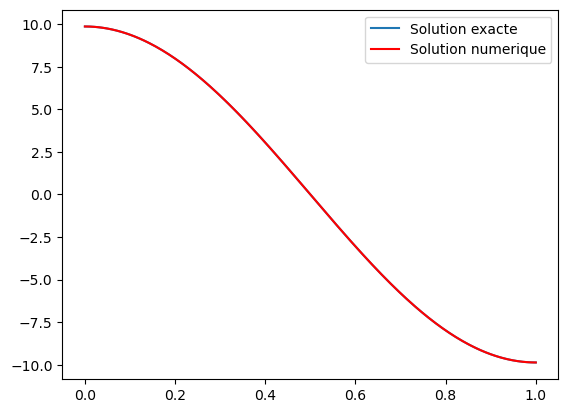

In [125]:
# Sol exacte calculé à la main :
f = lambda x: pi**2*cos(pi*x)

# Comparaison :

### Plot Solution
xx = linspace(0,1,500)
plt.plot(xx,f(xx),label='Solution exacte')
plt.plot(X,F,'r',label='Solution numerique')
plt.legend(loc='best')
plt.show()


On voit bien que les deux courbes se superposent, donc l'approche numérique marche bien

In [ ]:
plt.plot(X,Err,'b',label='Erreur')
plt.legend(loc='best')
plt.show()

In [ ]:
lu, piv = lu_factor(A)
U       = lu_solve((lu,piv),F)

X = noeuds
V =  exact(X)
Err = V - U



### Plot Solution
xx = linspace(0,1,500)
plt.plot(xx,exact(xx),'g',label='Solution exacte')
plt.plot(X,U,'r',label='Solution numerique')
plt.legend(loc='best')
plt.show()

plt.plot(X,Err,'b',label='Erreur')
plt.legend(loc='best')
plt.show()

# L2 erreur
ErrL2 = sqrt(sum(Err**2)/nx)
print("Erreur L2 ", ErrL2)


tab_err = []
tab_n   = 2**arange(3,10)

for nx in tab_n:
    noeuds,elements = maillage(nx)
    A,F             = assemblage(noeuds,elements,f)
    lu, piv = lu_factor(A)
    U       = lu_solve((lu,piv),F)
   
    X     = noeuds
    V     = exact(X)
    Err   = V - U
    ErrL2 = sqrt(sum(Err**2)/nx)

    tab_err += [ErrL2]

plt.loglog(tab_n,tab_err, label="Error")    
plt.loglog(tab_n,1./tab_n**2, label="Slope 2")
plt.legend(loc='best')
plt.show()